<a href="https://colab.research.google.com/github/pireylow/stock-price-prediction-LSTM-ARIMA/blob/main/LSTM_with_Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install yfinance

In [21]:
import random
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#set up sequential networks that are feed forward (dense)
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [22]:
#set stock information
ticker = 'SPY'
startdate = '2018-01-01'
enddate = '2023-07-01'

start = pd.to_datetime(startdate)
end = pd.to_datetime(enddate)
sdata = pdr.get_data_yahoo(ticker, start=start, end=end)

columnsTitles=['Open','High','Low','Close','Volume','Adj Close']
sdata=sdata.reindex(columns=columnsTitles)

close=sdata['Close']
close.describe()

[*********************100%***********************]  1 of 1 completed


count    1383.000000
mean      350.166153
std        66.335890
min       222.949997
25%       286.665009
50%       339.790009
75%       411.279999
max       477.709991
Name: Close, dtype: float64

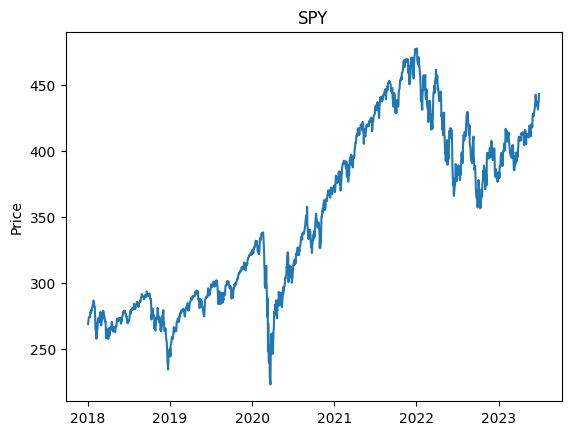

In [23]:
#simple plot for double check of data
plt.title(ticker)
plt.plot(sdata['Close'])
plt.ylabel('Price')
plt.show()

In [24]:
sdata

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,86655700,244.918625
2018-01-03,268.959991,270.640015,268.959991,270.470001,90070400,246.467804
2018-01-04,271.200012,272.160004,270.540009,271.609985,80636400,247.506653
2018-01-05,272.510010,273.559998,271.950012,273.420013,83524000,249.156021
2018-01-08,273.309998,274.100006,272.980011,273.920013,57319200,249.611649
...,...,...,...,...,...,...
2023-06-26,432.619995,434.609985,431.190002,431.440002,72823600,431.440002
2023-06-27,432.350006,436.809998,431.880005,436.170013,72813700,436.170013
2023-06-28,435.049988,437.440002,434.410004,436.390015,75636000,436.390015


In [25]:
#create price data set and changing array to 2D
Y = sdata.iloc[:,3].values
final_dataset = Y.reshape(len(Y),1) #scaler needs two dimensions

#create training set and test set
ntrvals = 1200
train_data=final_dataset[0:ntrvals,:]
valid_data=final_dataset[ntrvals:,:]


In [26]:
Y

array([268.76998901, 270.47000122, 271.60998535, ..., 436.39001465,
       438.10998535, 443.27999878])

In [27]:
final_dataset

array([[268.76998901],
       [270.47000122],
       [271.60998535],
       ...,
       [436.39001465],
       [438.10998535],
       [443.27999878]])

In [28]:
#scale the data set
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [29]:
#build the LSTM training set
#x is the window of past 60 data points from the present day
#y is the present day data point
#loop for all days in the training set
blocksize=60
x_train_data,y_train_data=[],[]
for i in range(blocksize,len(train_data)):
    x_train_data.append(scaled_data[i-blocksize:i,0])
    y_train_data.append(scaled_data[i,0])

#x_train_data --> array of lists of 60 numbers
#y_train_data --> array of present day values
#reshape(array, new_shape) --> input into any LSTM model has to be 3D
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
print(x_train_data.shape)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))
print(x_train_data.shape)
print(y_train_data.shape)

(1140, 60)
(1140, 60, 1)
(1140,)


In [30]:
y_train_data

array([0.15779556, 0.1355001 , 0.14845342, ..., 0.6084943 , 0.60504005,
       0.58977084])

In [31]:
print(y_train_data[0])
print(x_train_data[0,:,0])
print(x_train_data[1,:,0])
print(x_train_data.shape[1])

0.15779556372679826
[0.17985552 0.18652852 0.19100326 0.19810809 0.20007072 0.20250437
 0.2008557  0.20870623 0.21577178 0.21204273 0.22240536 0.2205606
 0.22554564 0.23449524 0.23685042 0.23641858 0.23688959 0.24976445
 0.24230647 0.23084477 0.23139425 0.23013813 0.20607637 0.16085726
 0.18126868 0.17553783 0.13612815 0.1513189  0.1663919  0.16898259
 0.18307427 0.19657718 0.19689115 0.19017898 0.18487986 0.18625372
 0.2031716  0.21569319 0.20207253 0.1911603  0.17565558 0.18107235
 0.19327998 0.19598842 0.19559587 0.20077724 0.2195007  0.21812684
 0.21106141 0.20548749 0.20430996 0.20116979 0.18660698 0.18841269
 0.18637147 0.15983678 0.1377767  0.16548905 0.14778619 0.14476366]
[0.18652852 0.19100326 0.19810809 0.20007072 0.20250437 0.2008557
 0.20870623 0.21577178 0.21204273 0.22240536 0.2205606  0.22554564
 0.23449524 0.23685042 0.23641858 0.23688959 0.24976445 0.24230647
 0.23084477 0.23139425 0.23013813 0.20607637 0.16085726 0.18126868
 0.17553783 0.13612815 0.1513189  0.1663919

In [32]:
#build the model -- can be multi-layer
lstm_model=Sequential()

#two layers of LSTM with how many units/nodes of LSTM per layer
#input into any LSTM model has to be 3D --> input_shape(number of time steps, number of features):
#1 or more samples (1140 in this case), 60 time steps and 1 feature
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))

#output of one node
lstm_model.add(Dense(1))

#optimise using adam optimiser on MSE
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [33]:
#train the model
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

1140/1140 - 53s - loss: 0.0027 - 53s/epoch - 47ms/step


In [34]:
#test the model
#inputs data 1200 -last 183 - 60 to find out where the window of 60 starts for the test set
inputs_data=scaled_data[len(final_dataset)-len(valid_data)-blocksize :,:]

X_test=[]
Y_test=[]

#create the arrays for x and y values of the test set
for i in range(blocksize,inputs_data.shape[0]):
  X_test.append(inputs_data[i-blocksize:i,0])
  Y_test.append(inputs_data[i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
Y_test=np.array(Y_test)
Y_test=np.reshape(Y_test,(Y_test.shape[0],1))

#use the lstm model to predict the y values using X_test data and undo the scaling of the data back to predicted prices
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

6/6 [==============================] - 1s 30ms/step


In [35]:
print(X_test.shape)
print(predicted_closing_price.shape)
print(len(valid_data))

mse =  (1/len(valid_data)) * np.sum((predicted_closing_price-valid_data)*(predicted_closing_price-valid_data))
print(mse)

(183, 60, 1)
(183, 1)
183
53.842913427395246


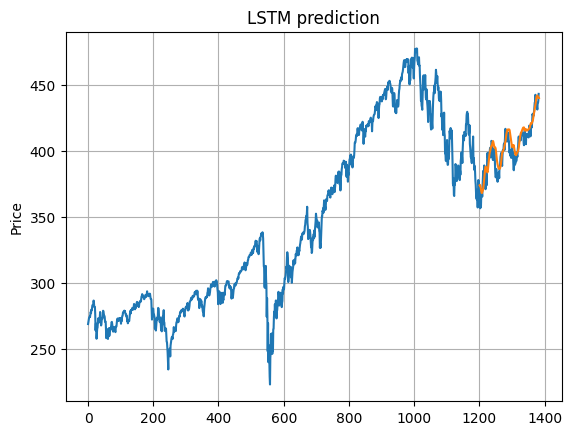

In [36]:
plt.plot(final_dataset)
plt.plot(list(range(ntrvals+1,len(close)+1)),list(predicted_closing_price))
plt.ylabel('Price')
plt.title('LSTM prediction')
plt.grid()

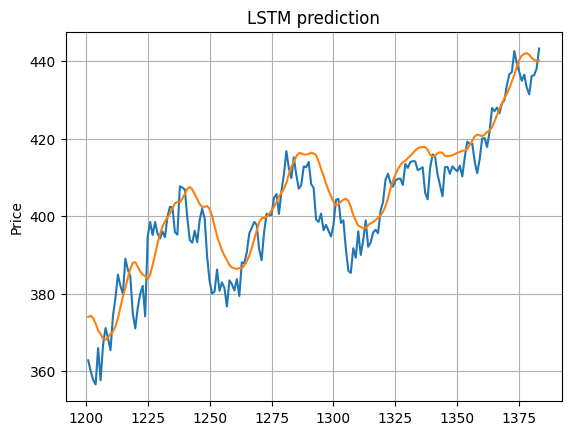

In [37]:
plt.plot(list(range(ntrvals+1,len(close)+1)),valid_data)
plt.plot(list(range(ntrvals+1,len(close)+1)),list(predicted_closing_price))

plt.ylabel('Price')
plt.title('LSTM prediction')
plt.grid()

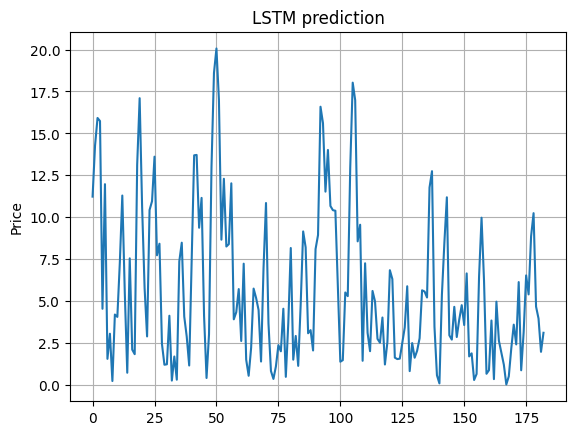

In [38]:

plt.plot(np.abs(predicted_closing_price-valid_data))
plt.ylabel('Price')
plt.title('LSTM prediction')
plt.grid()